In [49]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [50]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [53]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [54]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [55]:
# CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 106ms/step - loss: 1.2756 - accuracy: 0.5954 - val_loss: 0.5987 - val_accuracy: 0.6704
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5549 - accuracy: 0.7183 - val_loss: 0.5432 - val_accuracy: 0.7268
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4847 - accuracy: 0.7660 - val_loss: 0.5222 - val_accuracy: 0.7400
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3648 - accuracy: 0.8353 - val_loss: 0.5009 - val_accuracy: 0.7832
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3002 - accuracy: 0.8716 - val_loss: 0.4826 - val_accuracy: 0.8000
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2310 - accuracy: 0.9059 - val_loss: 0.6460 - val_accuracy: 0.7214
Epoch 8/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1561 - accuracy: 0.9388 - val_loss: 0.6703 - val_ac

In [59]:
# Because of overfitting, I will use batchNormalization and Droput

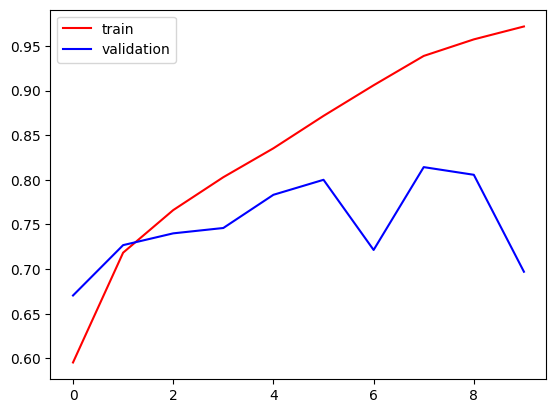

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

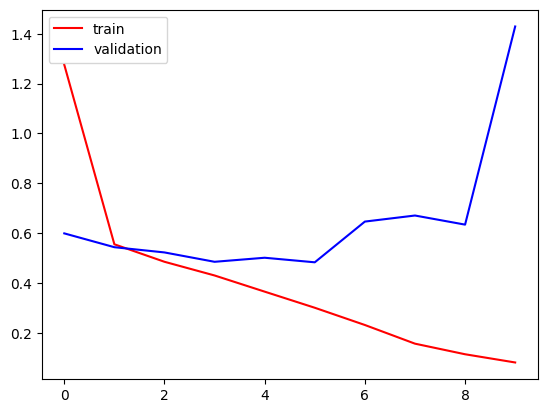

In [61]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [62]:
import cv2

In [63]:
test_img = cv2.imread('/content/dog.jpg')

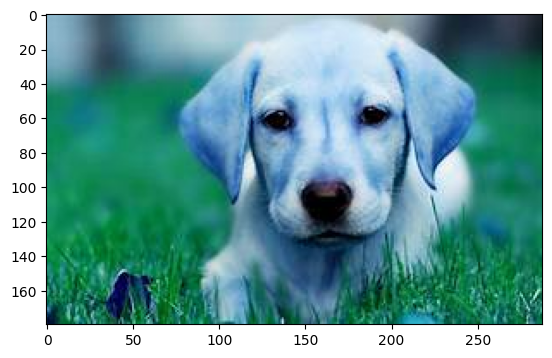

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(180, 288, 3)

In [66]:
test_img = cv2.resize(test_img,(256,256))

In [67]:
test_input = test_img.reshape((1,256,256,3))

In [68]:
model.predict(test_input)

1/1 [==============================] - 0s 161ms/step


array([[1.]], dtype=float32)